# ***Installation***

In [1]:
!pip install flaml[notebook]

# ***Importing Libraries and Dependencies***

In [2]:
import sklearn.datasets
import sklearn.metrics
import pandas as pd
from flaml import AutoML
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ***Data Loading***

In [3]:
X, y = sklearn.datasets.load_diabetes(return_X_y=True)

In [4]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# ***Train Test Split***

In [6]:
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)

# ***Initialize AutoML instance***

In [7]:
# Initialize an AutoML instance
automl = AutoML()

# ***Specify Settings***

In [10]:
automl_settings = {
    "time_budget": 10,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "diabetes.log",
}


# ***Fit***

In [11]:
'''The main flaml automl API'''
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

[flaml.automl: 10-05 09:58:42] {1432} INFO - Evaluation method: cv
[flaml.automl: 10-05 09:58:42] {1478} INFO - Minimizing error metric: 1-r2
[flaml.automl: 10-05 09:58:42] {1515} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree']
[flaml.automl: 10-05 09:58:42] {1748} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-05 09:58:42] {1866} INFO - Estimated sufficient time budget=229s. Estimated necessary time budget=0s.
[flaml.automl: 10-05 09:58:42] {1944} INFO -  at 0.0s,	estimator lgbm's best error=0.7675,	best estimator lgbm's best error=0.7675
[flaml.automl: 10-05 09:58:42] {1748} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-05 09:58:42] {1944} INFO -  at 0.1s,	estimator lgbm's best error=0.7675,	best estimator lgbm's best error=0.7675
[flaml.automl: 10-05 09:58:42] {1748} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-05 09:58:42] {1944} INFO -  at 0.1s,	estimator lgbm's best error=0.6102,	best estimator l

# ***Statistics***

In [13]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: extra_tree
Best hyperparmeter config: {'n_estimators': 4, 'max_features': 0.9586055955836026, 'max_leaves': 9}
Best accuracy on validation data: 0.4734
Training duration of best run: 1.133 s


In [14]:
automl.model.estimator

ExtraTreesRegressor(max_features=0.9586055955836026, max_leaf_nodes=9,
                    n_estimators=4, n_jobs=-1)

# ***Saving Model***

In [15]:
''' pickle and save the automl object '''
import pickle
with open('automl_diabetes.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

# ***Predictions***

In [17]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)

Predicted labels [155.22274152 104.32930054 159.42323579 104.32930054 169.39298065
 212.71803314 254.26025017 110.59195883 126.59664204 107.27274549
 198.92453231 178.45804663 113.53239622 104.32930054 223.41995621
 195.27376787 169.15873186 106.27815674 131.31261583 191.75275641
 169.39298065  99.37822167 108.64310262 105.32388928 104.32930054
 174.32045415  99.37822167 153.18503912 132.30720458 185.13499742
 156.55491875 185.22226107 222.06655554 104.32930054 147.13304244
 212.71803314 112.77010741 235.86005637 186.18836305 178.45804663
 151.67454631 161.48239225 113.53239622 116.53762644 140.94599185
 178.45804663 137.96575887 117.84612444 214.408416   178.45804663
  99.37822167 118.74111849 113.53239622 153.27388531 212.71803314
 118.57550523 167.14867826 112.62983762  99.37822167  99.37822167
 129.4585949  234.05472132 160.36991668 120.85980649 254.26025017
  99.37822167 107.81902854 181.38443824 181.33122746  99.37822167
 168.95444086 107.81902854 107.81902854 122.79727718 177.02

In [22]:

from sklearn.metrics import max_error, mean_absolute_error,mean_squared_log_error, mean_squared_error, r2_score
print('max error value :',max_error(y_test,y_pred))
print('mean absolute error value :',mean_absolute_error(y_test,y_pred))
print('mean squared error :', mean_squared_error(y_test,y_pred))
print("mean squared log error :", mean_squared_log_error(y_test,y_pred))
print("r2 score :" ,r2_score(y_test,y_pred)) 

max error value : 164.03424113119144
mean absolute error value : 46.99704328494246
mean squared error : 3349.384128944348
mean squared log error : 0.17264778323577365
r2 score : 0.3584980832443341


# ***Log History***

In [23]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename=automl_settings['log_file_name'], time_budget=240)
for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 331, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 331, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alp

# ***Learning Curve***

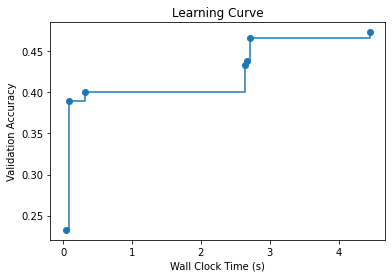

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()